In [1]:
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model




In [2]:
# Reading in data and dropping headings 

data_path  = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
crimes = pd.read_csv(data_path, header=None)
crimes = crimes.drop([0,1,2,3])

In [3]:
#cleaning the data - will create functions next time 


# changing title of column
crimes['city'] = crimes[0]
crimes['population'] = crimes[1]
crimes['violent\ncrime'] = crimes[2]
crimes['Murder and\nnonnegligent\nmanslaughter'] = crimes[3]
crimes['Rape\n(revised\ndefinition)1'] = crimes[4]
crimes['Rape\n(legacy\ndefinition)2'] = crimes[5]
crimes['Robbery'] = crimes[6]
crimes['Aggravated\nassault'] = crimes[7]
crimes['Property\ncrime'] = crimes[8]
crimes['Burglary'] = crimes[9]
crimes['Larceny-\ntheft'] = crimes[10]
crimes['Motor\nvehicle\ntheft'] = crimes[11]
crimes['Arson3'] = crimes[12]
                        
crimes



,0,1,2,3,4,5,6,7,8,9,...,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,...,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,...,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,...,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,...,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,...,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,...,0,NaN,3,4,16,223,53,165,5,NaN
10,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,...,0,NaN,0,3,2,46,10,36,0,NaN
11,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,...,0,NaN,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,...,1,NaN,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,...,0,NaN,2,4,3,210,16,188,6,1


In [4]:
# Removing old col without labels 
crimes = crimes.drop(0,axis=1)
crimes = crimes.drop(1,axis=1)
crimes = crimes.drop(2,axis=1)
crimes = crimes.drop(3,axis=1)
crimes = crimes.drop(4,axis=1)
crimes = crimes.drop(5,axis=1)
crimes = crimes.drop(6,axis=1)
crimes = crimes.drop(7,axis=1)
crimes = crimes.drop(8,axis=1)
crimes = crimes.drop(9,axis=1)
crimes = crimes.drop(10,axis=1)
crimes = crimes.drop(11,axis=1)
crimes = crimes.drop(12,axis=1)
crimes = crimes.drop('Rape\n(revised\ndefinition)1',axis=1)

In [5]:
crimes

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN
10,Alfred Village,"4,089",5,0,0,3,2,46,10,36,0,NaN
11,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,2,4,3,210,16,188,6,1


In [6]:
crimes = crimes.drop([4])

In [7]:
#drop missing values 
crimes = crimes.dropna()
crimes

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
5,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
11,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,2,4,3,210,16,188,6,1
14,Amsterdam,"18,182",30,0,0,12,18,405,99,291,15,0
15,Arcade Village,"2,053",0,0,0,0,0,39,3,35,1,0
16,Ardsley Village,"4,523",5,0,0,3,2,33,4,28,1,0
17,Asharoken Village,658,0,0,0,0,0,2,0,2,0,0


In [8]:
# Data cleaning

#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in crimes.columns:
    crimes[col]= crimes[col].apply(lambda x: str(x).replace(',', ''))
    crimes[col]= crimes[col].apply(lambda x: str(x).strip())

#Convert str and objects to float 
numerical_crimes = crimes.columns[1:]
for num_col in numerical_crimes:
    crimes[num_col]= crimes[num_col].apply(lambda x: float(x))

In [31]:
#checkign the types of the columns to make sure they are ready for graphing 
crimes.dtypes
crimes = crimes.drop('city',axis=1)

In [ ]:
#Visualizing thedsataset 
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['Robbery']))


In [ ]:
print(sns.scatterplot(x=crimes['population'], y=crimes['violent\ncrime']))


AxesSubplot(0.125,0.125;0.775x0.755)


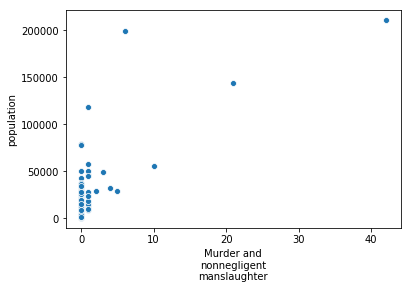

In [10]:
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['population']))
# I will keep the outlying values because they correspond with population  

In [13]:
#Feature Engineering 

#Prediction variable 
crimes['Arson_conditon'] = crimes['Arson3'].apply(lambda x: 1 if x > 0 else 0)




crimes['Robbery_conditon'] = crimes['Robbery'].apply(lambda x: 1 if x > 0 else 0)
crimes['Murder_condition'] = crimes['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)
crimes['pop_squared'] = crimes['population'] * crimes['population']

crimes['murder_condition_squared'] = crimes['Murder_condition']* crimes['Murder_condition']
crimes['nonviolentcrime'] = crimes['Larceny-\ntheft'] * crimes['Burglary']
#Additional features 

#crimes['Arson/robbery'] = (crimes['Arson3'])/(crimes['Robbery'])
#crimes['violentcrime/pop'] = (crimes['violent\ncrime'])/(['populations'])
crimes['nonviolentcrime'] = crimes['Larceny-\ntheft'] * crimes['Burglary']
#featues for model 
crimes['murder_pop'] = crimes['Murder and\nnonnegligent\nmanslaughter']/crimes['population']
crimes['Robbery_pop'] = crimes['Robbery'] / crimes['population']
crimes['murder_robbery'] = crimes['Robbery']/crimes['Murder and\nnonnegligent\nmanslaughter']







AxesSubplot(0.125,0.125;0.775x0.755)


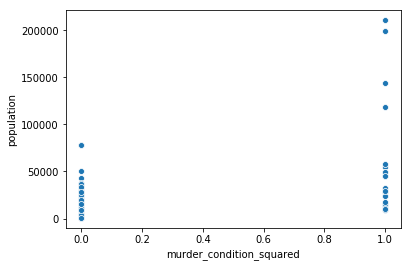

In [14]:
print(sns.scatterplot(x=crimes['murder_condition_squared'], y=crimes['population']))

,population,violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Arson_conditon,Robbery_conditon,Murder_condition,pop_squared,murder_condition_squared,nonviolentcrime,murder_pop,Robbery_pop,murder_robbery
population,1.000000,0.842771,0.721619,0.778008,0.825202,0.849594,0.869461,0.798252,0.882745,0.850976,0.701761,0.431079,0.387305,0.558612,0.915519,0.558612,0.675459,0.525076,0.599266,0.240673
violent\ncrime,0.842771,1.000000,0.935035,0.941682,0.991514,0.994766,0.928742,0.951748,0.901060,0.983210,0.917793,0.313597,0.216225,0.501509,0.903374,0.501509,0.894811,0.673998,0.742860,0.223779
Murder and\nnonnegligent\nmanslaughter,0.721619,0.935035,1.000000,0.928107,0.952565,0.903082,0.900364,0.938292,0.867897,0.953407,0.963200,0.237737,0.159119,0.449768,0.804753,0.449768,0.964046,0.725409,0.641392,-0.037108
Rape\n(legacy\ndefinition)2,0.778008,0.941682,0.928107,1.000000,0.922612,0.934009,0.938082,0.967139,0.910984,0.958307,0.926301,0.310676,0.220834,0.459615,0.821880,0.459615,0.918940,0.650335,0.658736,0.102848
Robbery,0.825202,0.991514,0.952565,0.922612,1.000000,0.973815,0.917779,0.939902,0.889972,0.979517,0.931607,0.286358,0.202660,0.470085,0.902455,0.470085,0.915558,0.667994,0.724650,0.197453
Aggravated\nassault,0.849594,0.994766,0.903082,0.934009,0.973815,1.000000,0.919836,0.942082,0.892867,0.970778,0.888278,0.330809,0.223805,0.520828,0.897319,0.520828,0.858473,0.666279,0.752992,0.258544
Property\ncrime,0.869461,0.928742,0.900364,0.938082,0.917779,0.919836,1.000000,0.977555,0.995724,0.957595,0.920765,0.389050,0.307479,0.502598,0.839382,0.502598,0.905302,0.619461,0.670842,0.153653
Burglary,0.798252,0.951748,0.938292,0.967139,0.939902,0.942082,0.977555,1.000000,0.954354,0.972423,0.952121,0.326631,0.241905,0.478224,0.811245,0.478224,0.941156,0.647180,0.686955,0.170915
Larceny-\ntheft,0.882745,0.901060,0.867897,0.910984,0.889972,0.892867,0.995724,0.954354,1.000000,0.933414,0.893610,0.411697,0.333036,0.505925,0.831597,0.505925,0.876384,0.596130,0.652664,0.146312
Motor\nvehicle\ntheft,0.850976,0.983210,0.953407,0.958307,0.979517,0.970778,0.957595,0.972423,0.933414,1.000000,0.935194,0.313240,0.226041,0.472164,0.892558,0.472164,0.924375,0.660781,0.690914,0.142440


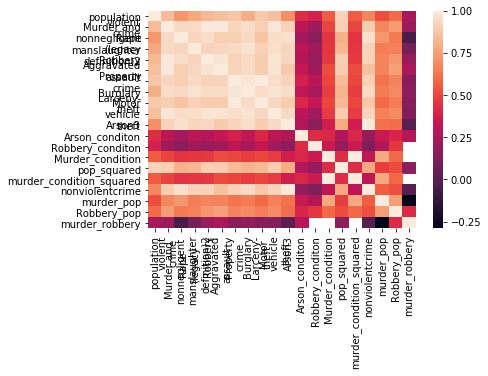

In [34]:
# Low correlation among features 
correlation_matrix = crimes.corr()
display(correlation_matrix)

import seaborn as sns
ax = sns.heatmap(correlation_matrix)

In [35]:
#simple log regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error


# Fitting the model 
logr = LogisticRegression(C=1e9)
Y = crimes['Arson_conditon'].values.reshape(-1, 1)
X = crimes[['population','Robbery_pop','Larceny-\ntheft', 'Murder_condition']]
logr.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=100)

print('With 10% Holdout: ' + str(logr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr, X, Y, cv=6))


#RSME 
modelPred = logr.predict(X)
meanSquaredError = mean_squared_error(Y, modelPred)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

# Model results 
print('\nCoefficients: \n', logr.coef_)
print('\nIntercept: \n', logr.intercept_)
print('\nR-squared:')
print(logr.score(X, Y))



#Classification report 
from sklearn.metrics import classification_report
print('Simple Logistic Report:')
print(classification_report(y_test, logr.predict(X_test)))


With 10% Holdout: 0.8947368421052632
Testing on Sample: 0.8074866310160428
[0.78125    0.74193548 0.77419355 0.90322581 0.77419355 0.87096774]
RMSE: 0.4387634544762784

Coefficients: 
 [[-2.02753832e-05  1.60995202e-04  6.99637421e-03  1.65018878e-01]]

Intercept: 
 [-2.02129354]

R-squared:
0.8074866310160428
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.50      0.67         4

   micro avg       0.89      0.89      0.89        19
   macro avg       0.94      0.75      0.80        19
weighted avg       0.91      0.89      0.88        19



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [36]:
# Ridge Regression 
# A simple log regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Fitting the model 
logr_ridge = LogisticRegression(C=10, penalty='l2')
Y1 = crimes['Arson_conditon'].values.reshape(-1, 1)
X1 =crimes[['population','Robbery_pop','Murder_condition', 'Larceny-\ntheft']]
logr_ridge.fit(X1, Y1)


# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=100)

print('With 10% Holdout: ' + str(logr_ridge.fit(X1_train, y1_train).score(X1_test, y1_test)))
print('Testing on Sample: ' + str(logr_ridge.fit(X1, Y1).score(X1, Y1)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr_ridge, X1, Y1, cv=6))


#RSME 
modelPred = logr_ridge.predict(X1)


meanSquaredError = mean_squared_error(Y1, modelPred)

rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

# Model results 
print('\nCoefficients: \n', logr_ridge.coef_)
print('\nIntercept: \n', logr_ridge.intercept_)
print('\nR-squared:')
print(logr_ridge.score(X1, Y1))



from sklearn.metrics import classification_report
print('Logistic Ridge Classification Report:')
print(classification_report(y1_test, logr_ridge.predict(X1_test)))





With 10% Holdout: 0.8947368421052632
Testing on Sample: 0.8074866310160428
[0.78125    0.74193548 0.77419355 0.90322581 0.77419355 0.87096774]
RMSE: 0.4387634544762784

Coefficients: 
 [[-2.07797519e-05  1.59117655e-04  1.63529033e-01  6.98696772e-03]]

Intercept: 
 [-2.00713603]

R-squared:
0.8074866310160428
Logistic Ridge Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.50      0.67         4

   micro avg       0.89      0.89      0.89        19
   macro avg       0.94      0.75      0.80        19
weighted avg       0.91      0.89      0.88        19



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [37]:
# Lasso Regression  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error 

#Fitting the model 

logr_lasso = LogisticRegression(C=1e9, penalty='l1')
Y2 = crimes['Arson_conditon'].values.reshape(-1, 1)
X2 = crimes[['population','Robbery_pop','Murder_condition', 'Larceny-\ntheft']]
logr_lasso.fit(X2, Y2)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.1, random_state=100)

print('With 10% Holdout: ' + str(logr_lasso.fit(X2_train, y2_train).score(X2_test, y2_test)))
print('Testing on Sample: ' + str(logr_lasso.fit(X2, Y2).score(X2, Y2)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr_lasso, X2, Y2, cv=6))


#RSME 
modelPred = logr_lasso.predict(X2)
meanSquaredError = mean_squared_error(Y2, modelPred)

rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

# Model results 
print('\nCoefficients: \n', logr_lasso.coef_)
print('\nIntercept: \n', logr_lasso.intercept_)
print('\nR-squared:')
print(logr_lasso.score(X2, Y2))





#Classification report 
from sklearn.metrics import classification_report
print('Logistic Lasso Classification Report:')
print(classification_report(y2_test, logr_lasso.predict(X2_test)))




With 10% Holdout: 0.8947368421052632
Testing on Sample: 0.8074866310160428
[0.78125    0.70967742 0.77419355 0.90322581 0.77419355 0.87096774]
RMSE: 0.4387634544762784

Coefficients: 
 [[-1.94967220e-05  3.60000000e+02  5.86202138e-01  6.39231629e-03]]

Intercept: 
 [-2.08497576]

R-squared:
0.8074866310160428
Logistic Lasso Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.50      0.67         4

   micro avg       0.89      0.89      0.89        19
   macro avg       0.94      0.75      0.80        19
weighted avg       0.91      0.89      0.88        19



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o